## HOMEWORK 5   524 SPRING 2023

## NAME: Huong Thien Do

## Q1

In [2]:
## Starter code for question 1

using CSV, DataFrames
using PyPlot, JuMP, HiGHS

# read and convert into an array
vtarget = CSV.read(joinpath(@__DIR__, "voltages.csv"), DataFrame, header=false);
vtarget = Array(vtarget[:, 1]);

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000669, 0.000000, 0, 0.000000, 0.000000
3, 14.310972, 200, 0.007446, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.4310953247e+01
HiGHS run time      :          0.01
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000626, 0.000000, 0, 0.000000, 0.000000
3, 50.146145, 200, 0.007691, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  5.0146129038e+01
HiGHS run time      :          0.01
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000550, 0.000000, 0, 0.000000, 0.000000
3, 141.088419, 200, 0.007096, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
Q

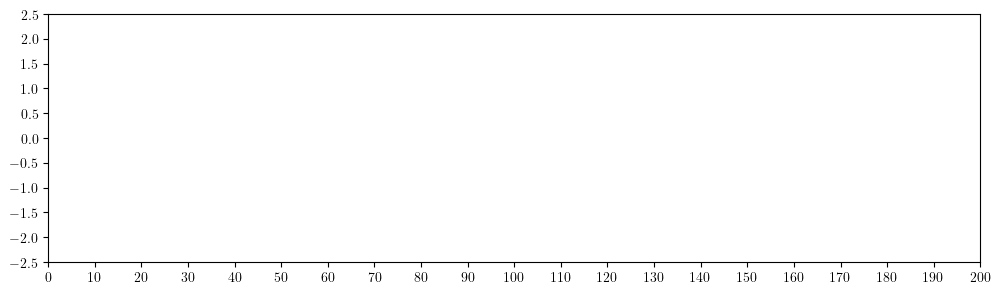

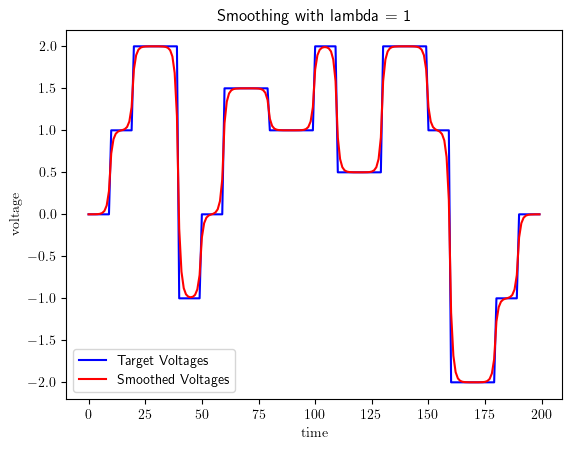

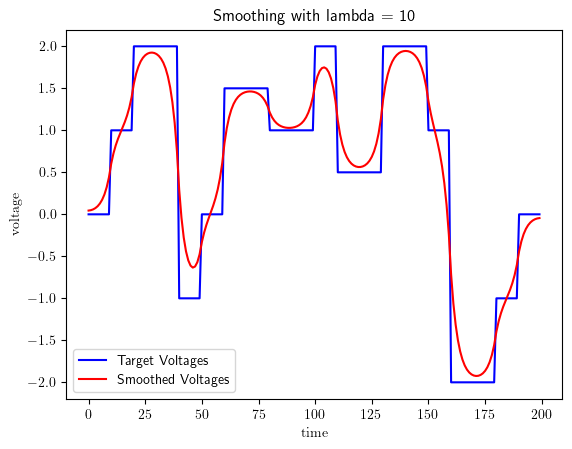

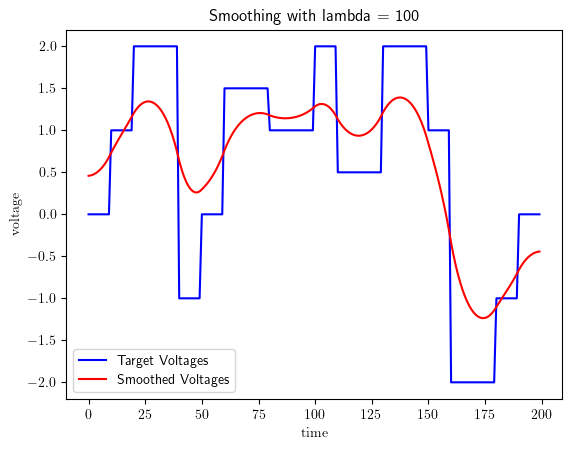

In [6]:
## More Starter code for question 1. You could use this code inside a function called "plotmodel(lambda)", 
## and then call plotmodel with three values of lambda to get the required plots.

# PyPlot.svg(false)
# Use Latex for nice-looking axis titles
PyPlot.rc("text", usetex=true)
# Create a figure
figure(figsize=(10, 3))
# Set the limit to axes
axis([0, 200, -2.5, 2.5])

PyPlot.tight_layout()

# set ticks
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](10) # Define interval of major ticks
ax[:xaxis][:set_major_locator](mx) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](.5)
ax[:yaxis][:set_major_locator](my)

# set up the regularization parameter values
lambdas = [1, 10, 100]

# Solve the regularized least squares problem for each value of x
for lambda in lambdas
    m = Model(HiGHS.Optimizer)
    @variable(m, v[1:200])
    @objective(m, Min, sum((vtarget[i]- v[i])^2 for i in 1:200) + lambda * sum((v[i+1] - v[i])^2 for i in 1:199))
    
    optimize!(m)
    v_opt = value.(v)

    figure()
    # plot the target voltages
    plot(vtarget,"b-",label="Target Voltages")
    # Plot the resulting voltages
    plot(v_opt, "r",label="Smoothed Voltages")
            
    xlabel(L"\textrm{time}")
    ylabel(L"\textrm{voltage}")
    legend()            
    title("Smoothing with lambda = $lambda")

end

## Q2a

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 39.427944, 2, 0.000463, 0.000000, 0, 0.000000, 0.000000
7, 1.880662, 3, 0.000558, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 7
Objective value     :  1.8806616352e+00
HiGHS run time      :          0.00


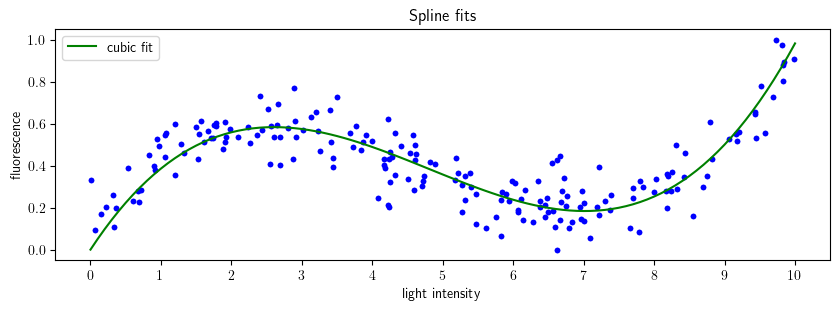

In [87]:
## Starter code for question 2

A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)
    plot(x, y, "b.")
end

# plot the points
plotpoints()
m = Model(HiGHS.Optimizer)
@variable(m, a[1:4])
@objective(m, Min, sum((y[i] - (a[1]*x[i]^3 + a[2]*x[i]^2 + a[3]*x[i] + a[4]))^2 for i = 1:length(x)))

@constraint(m, a[4] == 0)
@constraint(m, a[1] >= 0)
optimize!(m)

a_opt = value.(a) # get the solution

plot(x, y, "b.")
title("data")

xvals = 0:0.1:10
yvals1 = a_opt[1] * xvals.^3 + a_opt[2] * xvals.^2 + a_opt[3] * xvals
plot(xvals, yvals1, "g-", label="cubic fit")
title("Spline fits")
legend()
show()

## Q2b

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 39.427944, 3, 0.000374, 0.000000, 0, 0.000000, 0.000000
7, 2.058415, 3, 0.000457, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 7
Objective value     :  2.0584151094e+00
HiGHS run time      :          0.00


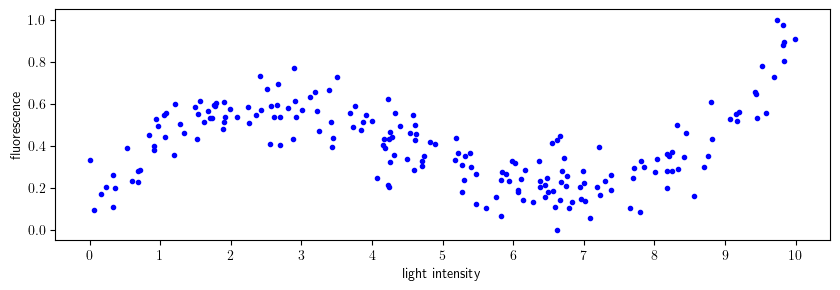

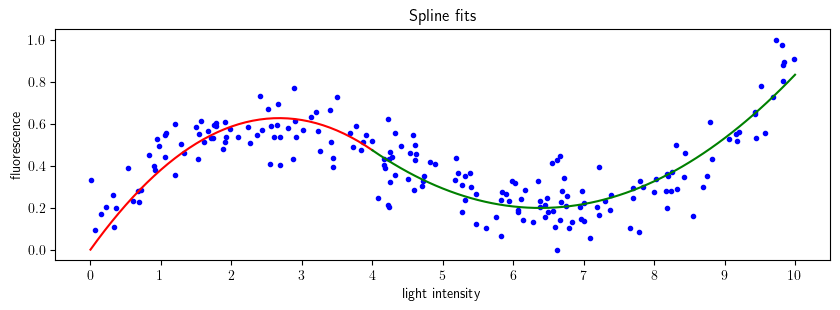

PyObject Text(0.5, 1.0, 'Spline fits')

In [94]:
A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)
    plot(x, y, "b.")
end
# plot the points
plotpoints()

x1 = x[1:76]; x2 = x[77:200];
y1 = y[1:76]; y2 = y[77:200];

# Order of polynomial used for fitting
k = 2
# Create the A1 matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n1 = length(x1)
A1 = zeros(n1,k+1)
for i = 1:n1
    for j = 1:k+1
        A1[i,j] = x1[i]^(k+1-j)
    end
end

# Create the A2 matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n2 = length(x2)
A2 = zeros(n2,k+1)
for i = 1:n2
    for j = 1:k+1
        A2[i,j] = x2[i]^(k+1-j)
    end
end
# define piecewise quadratic model
quad_m = Model(HiGHS.Optimizer)
@variable(quad_m, p[1:3])
@variable(quad_m, q[1:3])

@constraint(quad_m, p[3] == 0)  # ensure that p(x=0) = 0
@constraint(quad_m, 16*p[1] + 4*p[2] + p[3] == 16*q[1] + 4*q[2] + q[3])
@constraint(quad_m, 8*p[1]+ p[2] == 8*q[1] + q[2] )

@objective(quad_m, Min, sum( (y1 - A1*p).^2) + sum((y2 - A2*q).^2))
optimize!(quad_m)

p_opt = value.(p)
q_opt = value.(q)

function plot2b()
    figure(figsize=(10,3))
    plot(x, y, "b.")
    xticks(0:1:10)
    yticks(0:0.2:1)
    xlabel("light intensity")
    ylabel("fluorescence")
    xvals1 = 0:0.1:4
    yvals1 = p_opt[1] * xvals1.^2 .+ p_opt[2] * xvals1 .+ p_opt[3]
    xvals2 = 4:0.1:10
    yvals2 = q_opt[1] * xvals2.^2 .+ q_opt[2] * xvals2 .+ q_opt[3]
    plot(xvals1, yvals1, "r-", label="cubic fit")
    plot(xvals2, yvals2, "g-", label="piecewise quadratic fit")
    title("Spline fits")
end

plot2b()

## Q3a

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 6810500.508055, 238, 0.002781, 0.000000, 1, 0.000000, 0.000000
483, 105.935392, 238, 0.063142, 0.000000, 1, 0.000000, 0.032277
Model   status      : Optimal
QP ASM    iterations: 483
Objective value     :  1.0593070491e+02
HiGHS run time      :          0.06


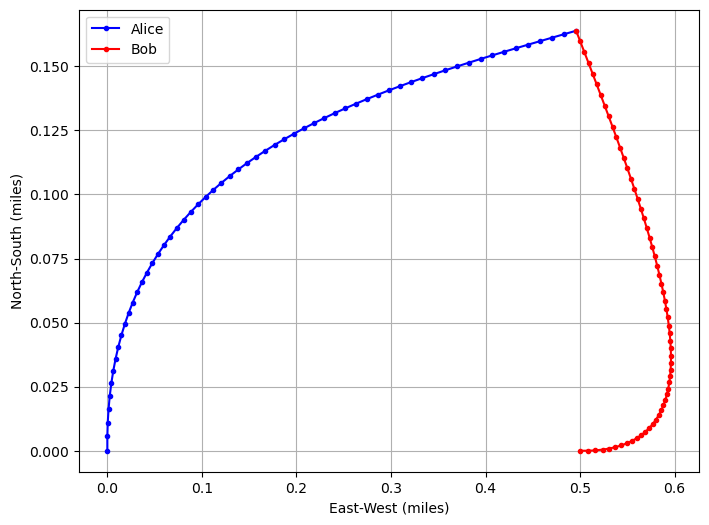

In [29]:
m = Model(HiGHS.Optimizer)

T = 60                    # length of time horizon
@variable(m, x_A[1:2,1:T])    # resulting position
@variable(m, v_A[1:2,1:T])    # resulting velocity
@variable(m, u_A[1:2,1:T])  # thruster input of Alice

@variable(m, x_B[1:2,1:T])    # resulting position
@variable(m, v_B[1:2,1:T])    # resulting velocity
@variable(m, u_B[1:2,1:T])  # thruster input of Bob

# constraint on start positions and velocities
@constraint(m, v_A[:,1] .== [0;20])
@constraint(m, x_A[:,1] .== [0;0])
@constraint(m, x_B[:,1] .== [0.5;0])
@constraint(m, v_B[:,1] .== [30;0])
@constraint(m, x_A[:,T] .== x_B[:,T])

# satisfy the dynamics of 2 hovercrafts
for i = 1:T-1
    @constraint(m, x_A[:,i+1] .== x_A[:,i] + (1/3600)*v_A[:,i])
    @constraint(m, v_A[:,i+1] .== v_A[:,i] + u_A[:,i])
    @constraint(m, x_B[:,i+1] .== x_B[:,i] + (1/3600)*v_B[:,i])
    @constraint(m, v_B[:,i+1] .== v_B[:,i] + u_B[:,i])
end

# minimize 2-norm
@objective(m, Min, sum(u_A.^2) + sum(u_B.^2) )

optimize!(m)
uopt_A = value.(x_A);
uopt_B = value.(x_B);

# Plot the trajectories
figure(figsize=(8,6))
plot(uopt_A[1,:], uopt_A[2,:], "b.-", label="Alice")
plot(uopt_B[1,:], uopt_B[2,:], "r.-", label="Bob")

xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc="upper left")
grid()

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 6810500.508055, 234, 0.006303, 0.000000, 1, 0.000000, 0.000000
435, 245.590267, 234, 0.121325, 0.000000, 1, 0.000000, 0.032951
Model   status      : Optimal
QP ASM    iterations: 435
Objective value     :  2.4558737581e+02
HiGHS run time      :          0.12


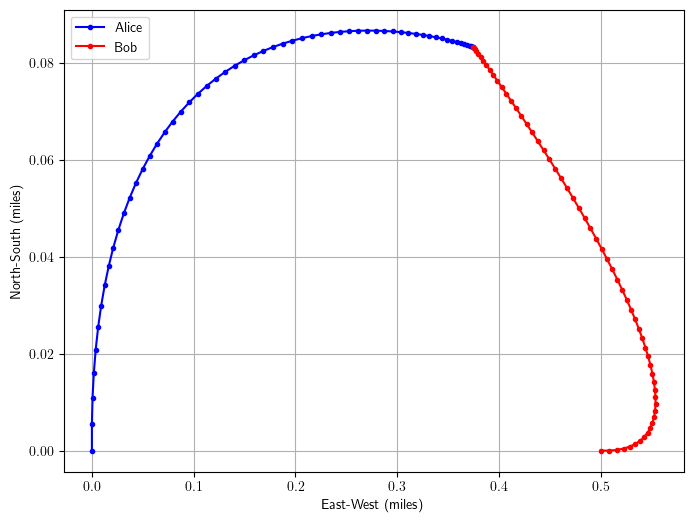

In [99]:
m = Model(HiGHS.Optimizer)

T = 60                        # length of time horizon 
@variable(m, x_A[1:2,1:T])    # resulting position of Alice
@variable(m, v_A[1:2,1:T])    # resulting velocity of Alice
@variable(m, u_A[1:2,1:T])    # thruster input of Alice

@variable(m, x_B[1:2,1:T])    # resulting position of Bob
@variable(m, v_B[1:2,1:T])    # resulting velocity of Bob
@variable(m, u_B[1:2,1:T])    # thruster input of Bob

# constraint on start positions and velocities
@constraint(m, v_A[:,1] .== [0;20])
@constraint(m, x_A[:,1] .== [0;0])
@constraint(m, v_B[:,1] .== [30;0])
@constraint(m, x_B[:,1] .== [0.5;0])
@constraint(m, x_A[:,T] .== x_B[:,T])

# constraint on end velocities
@constraint(m, v_A[:,T] .== [0;0])
@constraint(m, v_B[:,T] .== [0;0])
# satisfy the dynamics of 2 hovercrafts
for i = 1:T-1
    @constraint(m, x_A[:,i+1] .== x_A[:,i] + (1/3600)*v_A[:,i])
    @constraint(m, v_A[:,i+1] .== v_A[:,i] + u_A[:,i])
    @constraint(m, x_B[:,i+1] .== x_B[:,i] + (1/3600)*v_B[:,i])
    @constraint(m, v_B[:,i+1] .== v_B[:,i] + u_B[:,i])
end

# minimize 2-norm
@objective(m, Min, sum(u_A.^2) + sum(u_B.^2) )

optimize!(m)
uopt_A = value.(x_A);
uopt_B = value.(x_B);


# Plot the trajectories
figure(figsize=(8,6))
plot(uopt_A[1,:], uopt_A[2,:], "b.-", label="Alice")
plot(uopt_B[1,:], uopt_B[2,:], "r.-", label="Bob")

xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc="upper left")
grid()

The rendezvous locations are different!